### Nama Kelompok : Suka Kedistrak
Anggota:
1. Putrija BR Malau - 211402063
2. Gabryelle Ninna Deffanya Siahaan - 211402087
3. Vincent Enrique Shie - 211402111
4. Erli Gurning - 211402123

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes_dataset__2019.csv')

In [4]:
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


# EDA dan DATA CLEANSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

## Mengecek Nilai Null 

In [6]:
df.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [7]:
# Menghapus nilai null dan mengupdate DataFrame asli
df.dropna(axis=0, inplace=True)

# Memeriksa jumlah nilai null setelah operasi
print(df.isnull().sum())

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64


## Cek Format Penulisan Data

In [8]:
#cek format
print(df['Diabetic'].unique())
print(df['Diabetic'].value_counts())
print(df['RegularMedicine'].unique())
print(df['RegularMedicine'].value_counts())
print(df['BPLevel'].unique())
print(df['BPLevel'].value_counts())
print(df['Pdiabetes'].unique())
print(df['Pdiabetes'].value_counts())

['no' 'yes' ' no']
no     641
yes    263
 no      1
Name: Diabetic, dtype: int64
['no' 'yes' 'o']
no     581
yes    323
o        1
Name: RegularMedicine, dtype: int64
['high' 'normal' 'low' 'Low' 'High' 'normal ']
normal     667
high       205
low         25
High         5
Low          2
normal       1
Name: BPLevel, dtype: int64
['0' 'yes']
0      891
yes     14
Name: Pdiabetes, dtype: int64


In [9]:
df['Diabetic'] = df['Diabetic'].replace({' no': 'no'})
df['RegularMedicine'] = df['RegularMedicine'].replace({'o': 'no'})
df['BPLevel'] = df['BPLevel'].replace({'High': 'high', 'Low': 'low', 'normal ': 'normal'})
df['Pdiabetes'] = df['Pdiabetes'].replace({'0': 'no'})

In [10]:
#cek format
print(df['Diabetic'].unique())
print(df['Diabetic'].value_counts())
print(df['RegularMedicine'].unique())
print(df['RegularMedicine'].value_counts())
print(df['BPLevel'].unique())
print(df['BPLevel'].value_counts())
print(df['Pdiabetes'].unique())
print(df['Pdiabetes'].value_counts())

['no' 'yes']
no     642
yes    263
Name: Diabetic, dtype: int64
['no' 'yes']
no     582
yes    323
Name: RegularMedicine, dtype: int64
['high' 'normal' 'low']
normal    668
high      210
low        27
Name: BPLevel, dtype: int64
['no' 'yes']
no     891
yes     14
Name: Pdiabetes, dtype: int64


## Melihat Outliers

In [11]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,905.000000,905.000000,905.000000,905.000000
mean,25.520442,6.956906,5.546961,0.386740
std,5.276835,1.287843,1.870904,0.910023
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,24.000000,7.000000,6.000000,0.000000
75%,28.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


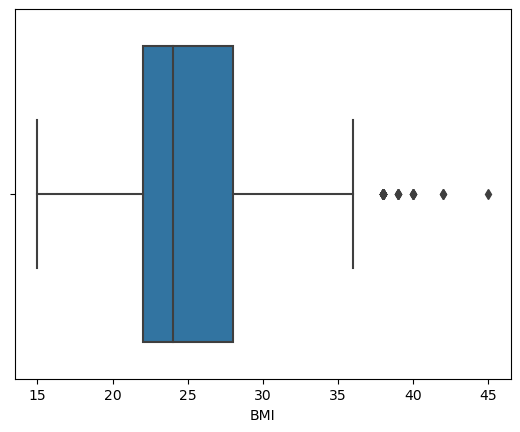

In [12]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'BMI')
plt.show() 

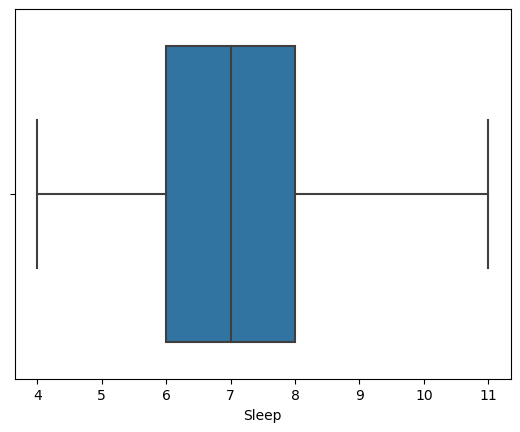

In [13]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Sleep')
plt.show() 

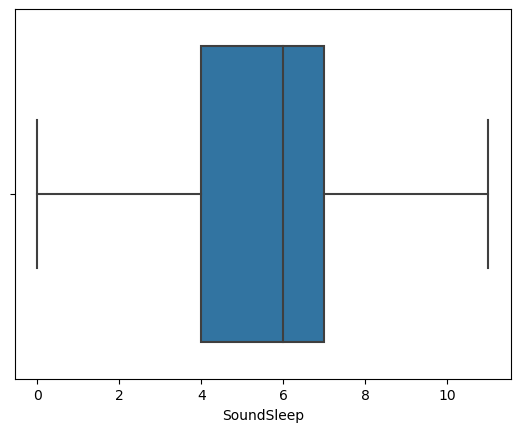

In [14]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'SoundSleep')
plt.show() 

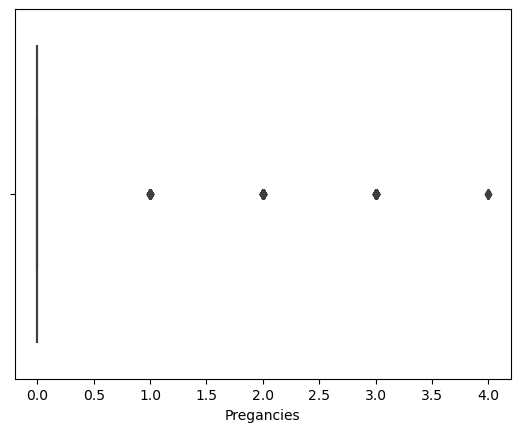

In [15]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Pregancies')
plt.show() 

## Mengubah Tipe Data

In [16]:
df['Pregancies'] = df['Pregancies'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               905 non-null    object 
 1   Gender            905 non-null    object 
 2   Family_Diabetes   905 non-null    object 
 3   highBP            905 non-null    object 
 4   PhysicallyActive  905 non-null    object 
 5   BMI               905 non-null    float64
 6   Smoking           905 non-null    object 
 7   Alcohol           905 non-null    object 
 8   Sleep             905 non-null    int64  
 9   SoundSleep        905 non-null    int64  
 10  RegularMedicine   905 non-null    object 
 11  JunkFood          905 non-null    object 
 12  Stress            905 non-null    object 
 13  BPLevel           905 non-null    object 
 14  Pregancies        905 non-null    int64  
 15  Pdiabetes         905 non-null    object 
 16  UriationFreq      905 non-null    object 
 1

## Mengecek Duplikasi Data

In [18]:
df.duplicated().sum()

632

Jumlah data duplikat yang ada cukup besar yaitu dengan 632 data dibandingkan keseluruhan jumlah data sebesar 905 data. Kami memutuskan untuk tidak menghapus data duplikat yang ada agar tidak mengubah akurasi data.

# Visualisasi Data Terhadap Target

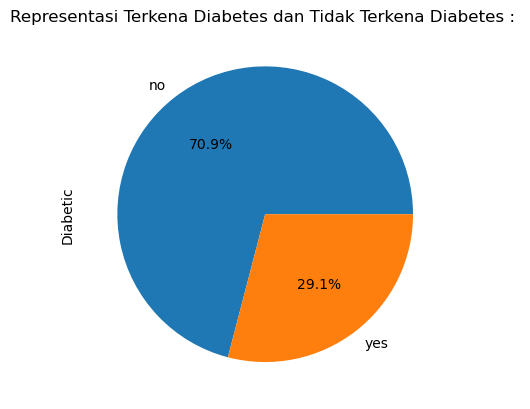

In [19]:
df['Diabetic'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Representasi Terkena Diabetes dan Tidak Terkena Diabetes : ')
plt.show()

## Imbalance Data

In [20]:
from sklearn.utils import resample

# kita bagi menjadi 2 kelompok: mayor dan minor 
df_majority = df[(df['Diabetic']=="no")] 
df_minority = df[(df['Diabetic']=="yes")]

# oversampling

# perbanyak nilai minor
df_minority_upsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples= 642,
                                 random_state=42) 

# gabung nilai mayor dan minor yang sudah diperbanyak
df = pd.concat([df_minority_upsampled, df_majority])

In [21]:
print(df['Diabetic'].unique())
print(df['Diabetic'].value_counts())

['yes' 'no']
yes    642
no     642
Name: Diabetic, dtype: int64


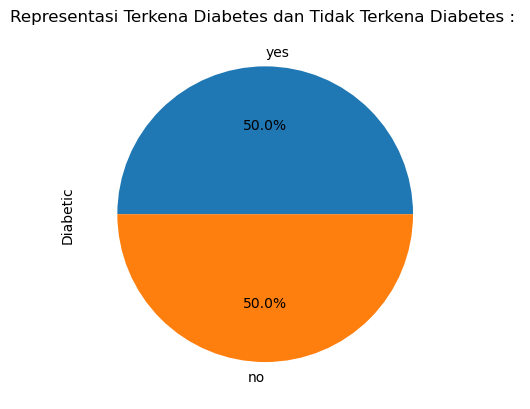

In [22]:
df['Diabetic'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Representasi Terkena Diabetes dan Tidak Terkena Diabetes : ')
plt.show()

## Data Numerik Terhadap Target

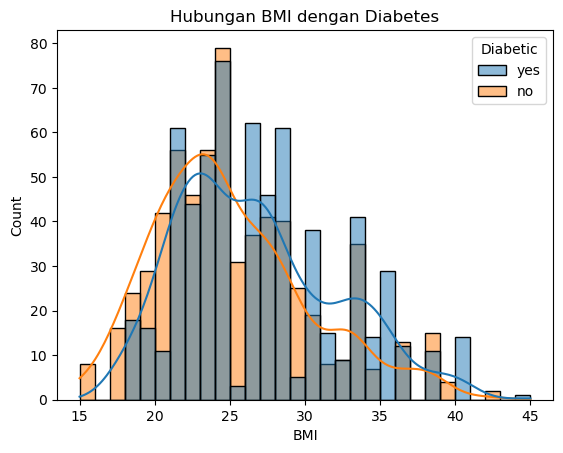

In [23]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='BMI', hue = 'Diabetic', binwidth = 1, kde=True)
plt.title('Hubungan BMI dengan Diabetes')
plt.show() 

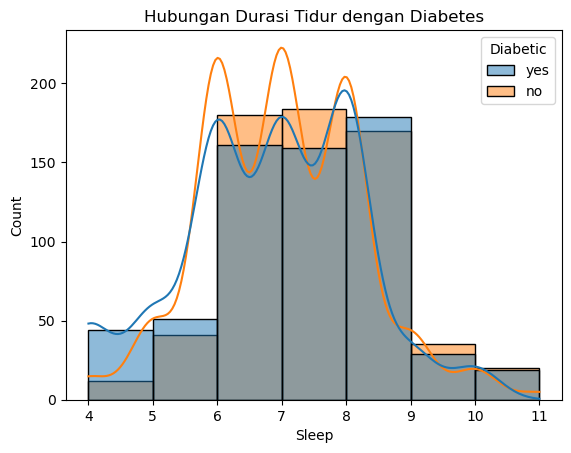

In [24]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='Sleep', hue = 'Diabetic', binwidth = 1, kde=True)
plt.title('Hubungan Durasi Tidur dengan Diabetes')
plt.show() 

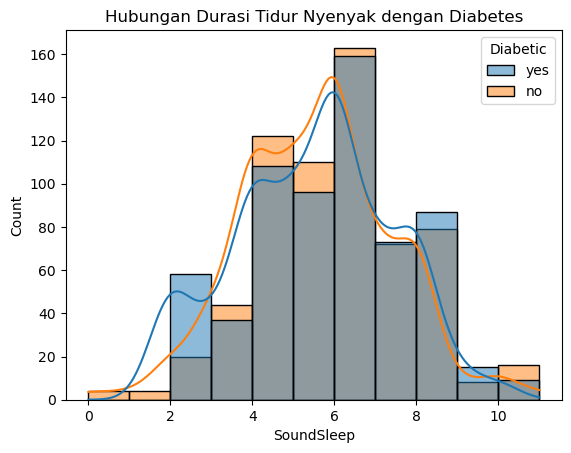

In [25]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='SoundSleep', hue = 'Diabetic', binwidth = 1, kde=True)
plt.title('Hubungan Durasi Tidur Nyenyak dengan Diabetes')
plt.show() 

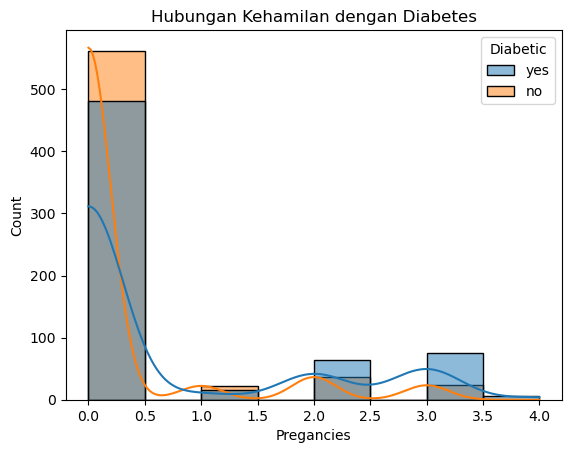

In [26]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='Pregancies', hue = 'Diabetic', binwidth = 0.5, kde=True)
plt.title('Hubungan Kehamilan dengan Diabetes')
plt.show() 

## Data Kategorikal Terhadap Target

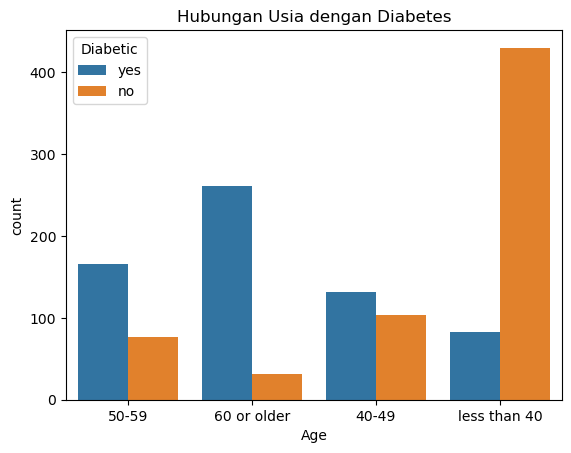

In [27]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Age', hue = 'Diabetic')
plt.title('Hubungan Usia dengan Diabetes')
plt.show() 

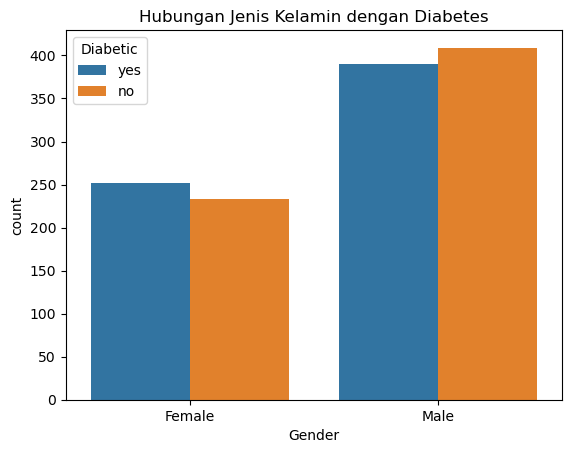

In [28]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Gender', hue = 'Diabetic')
plt.title('Hubungan Jenis Kelamin dengan Diabetes')
plt.show() 

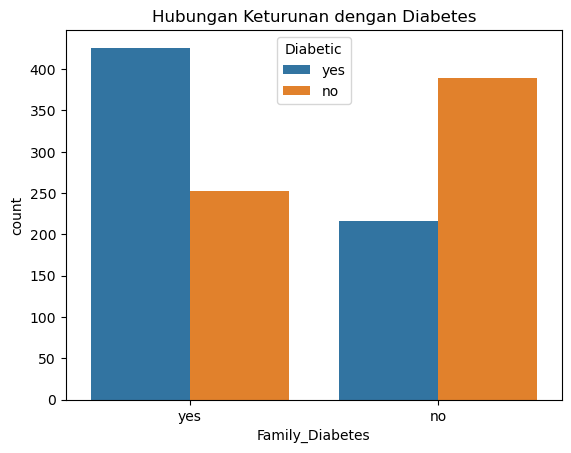

In [29]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Family_Diabetes', hue = 'Diabetic')
plt.title('Hubungan Keturunan dengan Diabetes')
plt.show() 

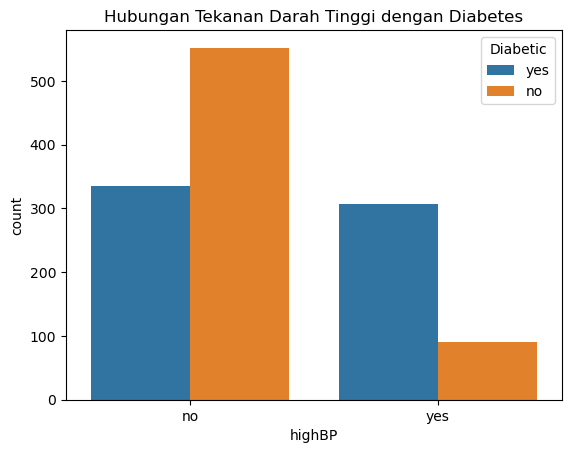

In [30]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='highBP', hue = 'Diabetic')
plt.title('Hubungan Tekanan Darah Tinggi dengan Diabetes')
plt.show() 

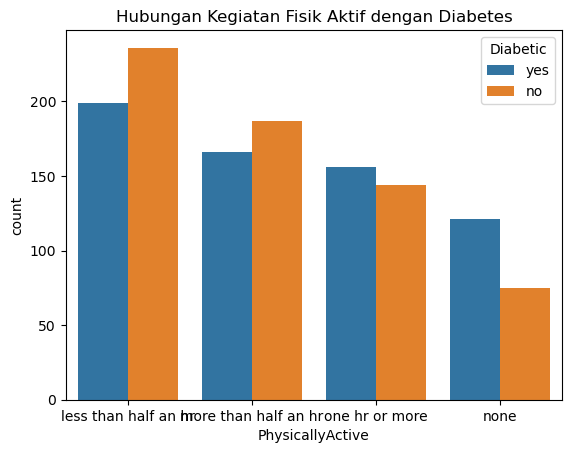

In [31]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='PhysicallyActive', hue = 'Diabetic')
plt.title('Hubungan Kegiatan Fisik Aktif dengan Diabetes')
plt.show() 

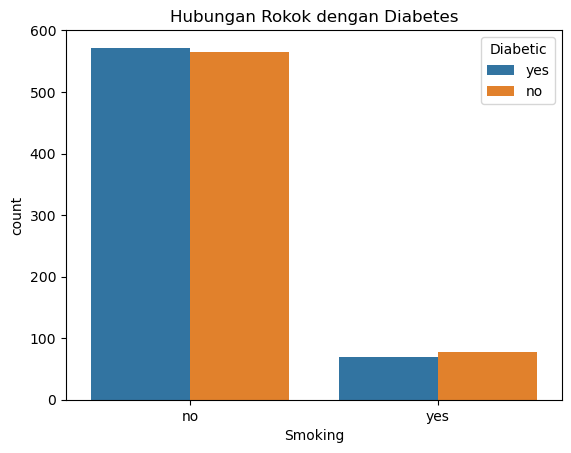

In [32]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Smoking', hue = 'Diabetic')
plt.title('Hubungan Rokok dengan Diabetes')
plt.show() 

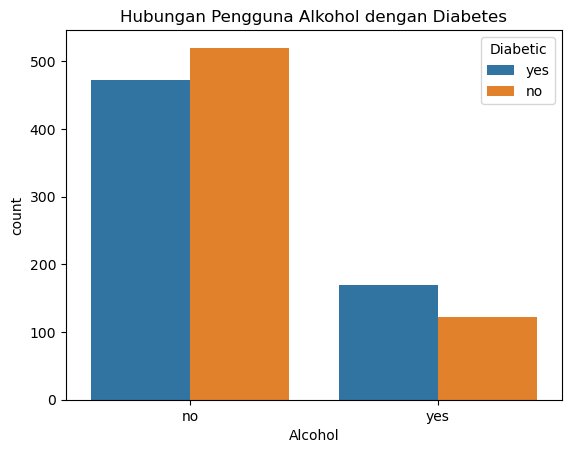

In [33]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Alcohol', hue = 'Diabetic')
plt.title('Hubungan Pengguna Alkohol dengan Diabetes')
plt.show() 

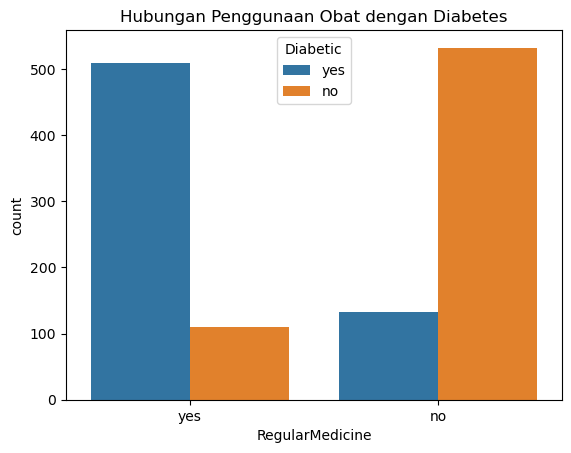

In [34]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='RegularMedicine', hue = 'Diabetic')
plt.title('Hubungan Penggunaan Obat dengan Diabetes')
plt.show() 

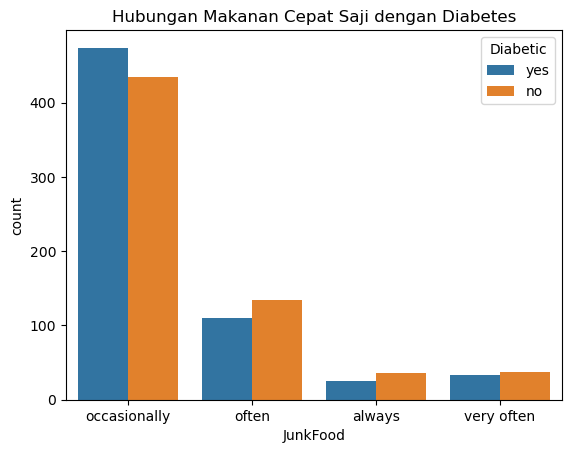

In [35]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='JunkFood', hue = 'Diabetic')
plt.title('Hubungan Makanan Cepat Saji dengan Diabetes')
plt.show() 

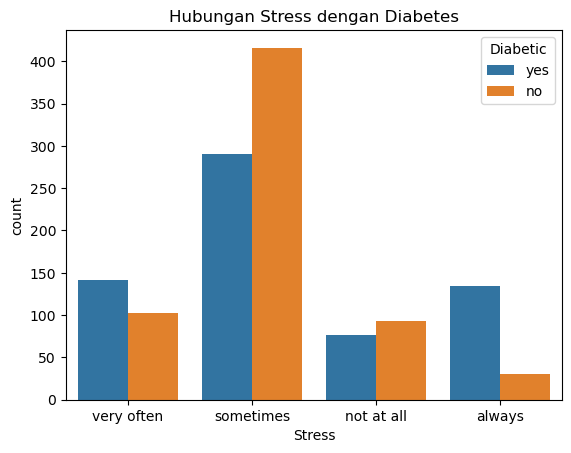

In [36]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Stress', hue = 'Diabetic')
plt.title('Hubungan Stress dengan Diabetes')
plt.show() 

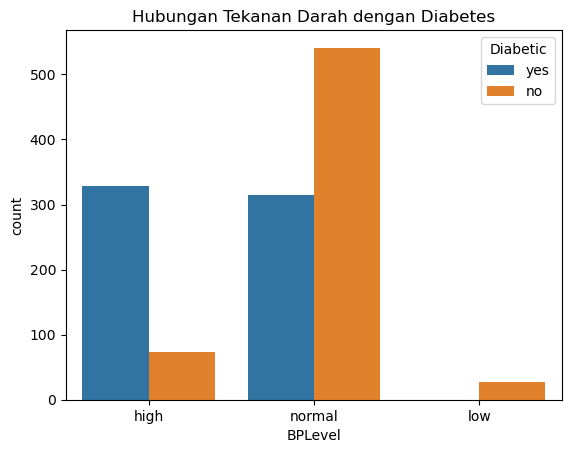

In [37]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='BPLevel', hue = 'Diabetic')
plt.title('Hubungan Tekanan Darah dengan Diabetes')
plt.show() 

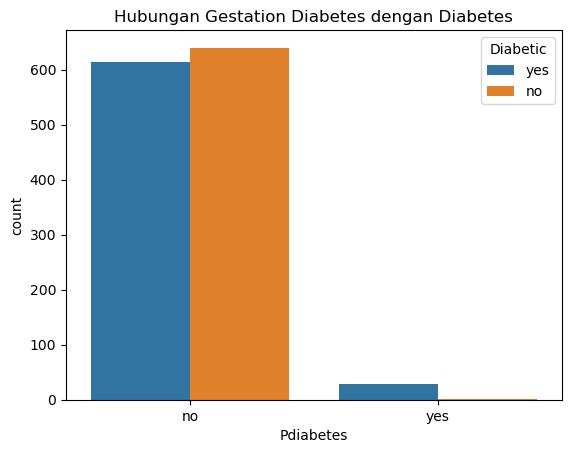

In [38]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Pdiabetes', hue = 'Diabetic')
plt.title('Hubungan Gestation Diabetes dengan Diabetes')
plt.show() 

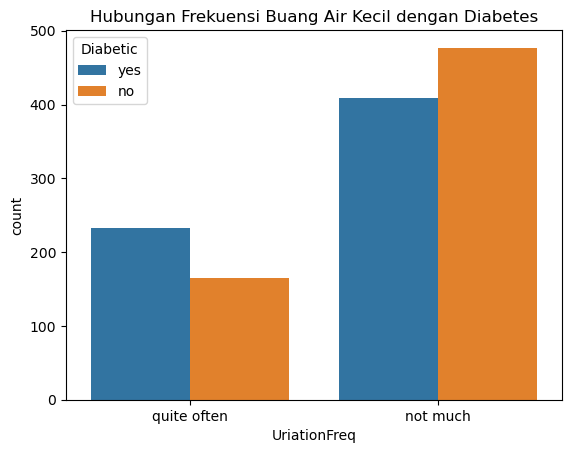

In [39]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='UriationFreq', hue = 'Diabetic')
plt.title('Hubungan Frekuensi Buang Air Kecil dengan Diabetes')
plt.show() 

# Data Preparation, Encoding

In [40]:
#Ubah nilai "Yes" and "No" menjadi 1 dan 0

df.loc[df["Diabetic"] == "no", "Diabetic"] = 0
df.loc[df["Diabetic"] == "yes", "Diabetic"] = 1

In [41]:
#Ubah tipe datanya menjadi intejer

df["Diabetic"] = df["Diabetic"].astype(int)

In [42]:
#one hot encoding
#df = pd.get_dummies(df)
#df.head()

In [43]:
# Ambil kolom-kolom kategorikal
cate_cols = df.select_dtypes(include=['object']).columns
# Ambil fungsi LabelEncoder ke variabel 'le'
le = preprocessing.LabelEncoder()
# copy dataframe ke variabel baru
df = df.copy()

# Encode label kategorikal menggunakan Label Encoder
for col in cate_cols:
    df[col] = le.fit_transform(df[col].astype(str))

df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
348,1,0,1,0,0,28.0,0,0,7,4,1,1,3,0,0,0,1,1
368,2,1,1,0,1,26.0,0,1,8,3,1,1,2,2,0,0,1,1
276,0,1,0,1,1,27.0,0,0,8,8,1,1,1,0,0,0,0,1
702,2,1,0,0,0,30.0,0,1,6,2,1,2,0,0,0,0,0,1
69,3,1,1,1,3,26.0,1,1,5,4,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,0,1,1,0,0,24.0,0,0,7,5,0,1,2,2,0,0,0,0
935,3,0,1,0,0,25.0,0,0,8,4,1,1,2,2,0,0,0,0
943,0,1,0,0,3,24.0,0,1,6,5,0,1,1,2,0,0,0,0
949,2,1,0,1,2,23.0,0,0,6,5,1,1,2,0,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 348 to 950
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1284 non-null   int32  
 1   Gender            1284 non-null   int32  
 2   Family_Diabetes   1284 non-null   int32  
 3   highBP            1284 non-null   int32  
 4   PhysicallyActive  1284 non-null   int32  
 5   BMI               1284 non-null   float64
 6   Smoking           1284 non-null   int32  
 7   Alcohol           1284 non-null   int32  
 8   Sleep             1284 non-null   int64  
 9   SoundSleep        1284 non-null   int64  
 10  RegularMedicine   1284 non-null   int32  
 11  JunkFood          1284 non-null   int32  
 12  Stress            1284 non-null   int32  
 13  BPLevel           1284 non-null   int32  
 14  Pregancies        1284 non-null   int64  
 15  Pdiabetes         1284 non-null   int32  
 16  UriationFreq      1284 non-null   int32  

### Normalization

In [45]:
# Kami melakukan normalisasi data di ubah menjadi rentang 0-1
# Min-Max Scaler
# Ambil hanya beberapa kolom yang akan dinormalisasi

X = np.array(df['BMI']).reshape(-1,1)

scaler = preprocessing.MinMaxScaler()
df_scaled = df
scaler.fit(X)
X_scaled = scaler.transform(X)
scaled_BMI = X_scaled.reshape(1,-1)[0]
df_scaled['BMI_scaled'] = scaled_BMI

df_scaled

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,BMI_scaled
348,1,0,1,0,0,28.0,0,0,7,4,1,1,3,0,0,0,1,1,0.433333
368,2,1,1,0,1,26.0,0,1,8,3,1,1,2,2,0,0,1,1,0.366667
276,0,1,0,1,1,27.0,0,0,8,8,1,1,1,0,0,0,0,1,0.400000
702,2,1,0,0,0,30.0,0,1,6,2,1,2,0,0,0,0,0,1,0.500000
69,3,1,1,1,3,26.0,1,1,5,4,1,2,1,0,0,0,0,1,0.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,0,1,1,0,0,24.0,0,0,7,5,0,1,2,2,0,0,0,0,0.300000
935,3,0,1,0,0,25.0,0,0,8,4,1,1,2,2,0,0,0,0,0.333333
943,0,1,0,0,3,24.0,0,1,6,5,0,1,1,2,0,0,0,0,0.300000
949,2,1,0,1,2,23.0,0,0,6,5,1,1,2,0,0,0,0,0,0.266667


In [46]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 348 to 950
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1284 non-null   int32  
 1   Gender            1284 non-null   int32  
 2   Family_Diabetes   1284 non-null   int32  
 3   highBP            1284 non-null   int32  
 4   PhysicallyActive  1284 non-null   int32  
 5   BMI               1284 non-null   float64
 6   Smoking           1284 non-null   int32  
 7   Alcohol           1284 non-null   int32  
 8   Sleep             1284 non-null   int64  
 9   SoundSleep        1284 non-null   int64  
 10  RegularMedicine   1284 non-null   int32  
 11  JunkFood          1284 non-null   int32  
 12  Stress            1284 non-null   int32  
 13  BPLevel           1284 non-null   int32  
 14  Pregancies        1284 non-null   int64  
 15  Pdiabetes         1284 non-null   int32  
 16  UriationFreq      1284 non-null   int32  

In [47]:
# Menghapus kolom 'BMI'
df_scaled = df_scaled.drop('BMI', axis=1)
print(df_scaled)

     Age  Gender  Family_Diabetes  highBP  PhysicallyActive  Smoking  Alcohol  \
348    1       0                1       0                 0        0        0   
368    2       1                1       0                 1        0        1   
276    0       1                0       1                 1        0        0   
702    2       1                0       0                 0        0        1   
69     3       1                1       1                 3        1        1   
..   ...     ...              ...     ...               ...      ...      ...   
934    0       1                1       0                 0        0        0   
935    3       0                1       0                 0        0        0   
943    0       1                0       0                 3        0        1   
949    2       1                0       1                 2        0        0   
950    2       1                0       1                 0        0        1   

     Sleep  SoundSleep  Reg

In [48]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 348 to 950
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1284 non-null   int32  
 1   Gender            1284 non-null   int32  
 2   Family_Diabetes   1284 non-null   int32  
 3   highBP            1284 non-null   int32  
 4   PhysicallyActive  1284 non-null   int32  
 5   Smoking           1284 non-null   int32  
 6   Alcohol           1284 non-null   int32  
 7   Sleep             1284 non-null   int64  
 8   SoundSleep        1284 non-null   int64  
 9   RegularMedicine   1284 non-null   int32  
 10  JunkFood          1284 non-null   int32  
 11  Stress            1284 non-null   int32  
 12  BPLevel           1284 non-null   int32  
 13  Pregancies        1284 non-null   int64  
 14  Pdiabetes         1284 non-null   int32  
 15  UriationFreq      1284 non-null   int32  
 16  Diabetic          1284 non-null   int32  

# Modeling

## Train Test Split

In [49]:
# Definisikan nilai X dan y
from sklearn.preprocessing import MinMaxScaler

X = df_scaled.loc[:, df_scaled.columns != 'Diabetic']
y = df_scaled["Diabetic"]

In [50]:
# Pisahkan data X dan y menjadi data tes dan data train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. SVM

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#svm default
svm = SVC() 
svm = svm.fit(X_train,y_train)

## 2. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

## 3. Decission Tree

In [53]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

## 4. Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_train, y_train)

# Evaluation

In [55]:
y_svmd = svm.predict(X_test)
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_nb = nb.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix SVM Default:\n",confusion_matrix(y_test, y_svmd))
print("Confusion Matrix Logistic Regression:\n",confusion_matrix(y_test, y_lr))
print("Confusion Matrix Decision Tree:\n",confusion_matrix(y_test, y_dtree))
print("Confusion Matrix Naive Bayes:\n",confusion_matrix(y_test, y_nb))

Confusion Matrix SVM Default:
 [[106  15]
 [ 24 112]]
Confusion Matrix Logistic Regression:
 [[104  17]
 [ 20 116]]
Confusion Matrix Decision Tree:
 [[119   2]
 [ 11 125]]
Confusion Matrix Naive Bayes:
 [[111  10]
 [ 43  93]]


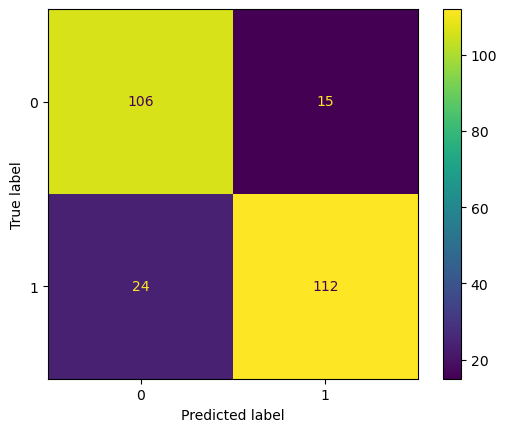

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix SVM 
cm_svmd = confusion_matrix(y_test, y_svmd)
ConfusionMatrixDisplay(confusion_matrix=cm_svmd).plot()

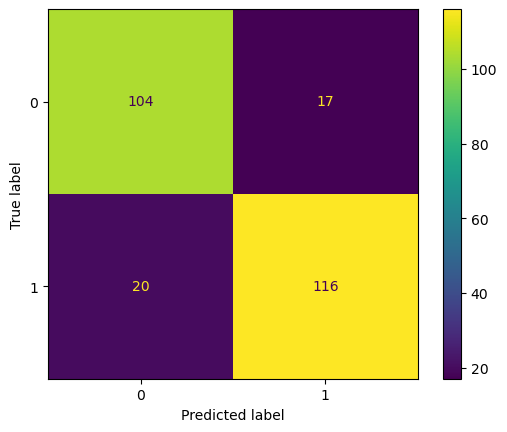

In [58]:
# Confusion Matrix Logistic Regession
cm_lr = confusion_matrix(y_test, y_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot()

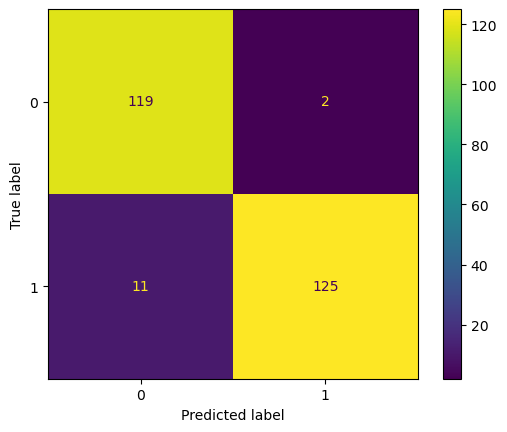

In [59]:
# Confusion Matrix Decision Tree
cm_dtree = confusion_matrix(y_test, y_dtree)
ConfusionMatrixDisplay(confusion_matrix=cm_dtree).plot()

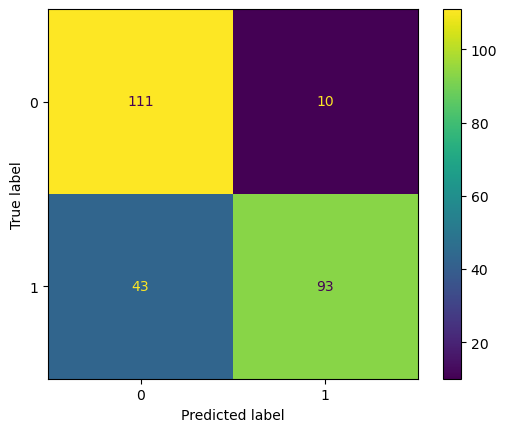

In [60]:
# Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_nb)
ConfusionMatrixDisplay(confusion_matrix=cm_nb).plot()

In [61]:
from sklearn.metrics import accuracy_score

print("Akurasi SVM Default:", accuracy_score(y_test, y_svmd))
print("Akurasi Logistic Regression:", accuracy_score(y_test, y_lr))
print("Akurasi Decision Tree:", accuracy_score(y_test, y_dtree))
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_nb))

Akurasi SVM Default: 0.8482490272373541
Akurasi Logistic Regression: 0.8560311284046692
Akurasi Decision Tree: 0.9494163424124513
Akurasi Naive Bayes: 0.7937743190661478


In [62]:
from sklearn.metrics import precision_score

print("Presisi SVM Default:", precision_score(y_test, y_svmd))
print("Presisi Logistic Regression:", precision_score(y_test, y_lr))
print("Presisi Decision Tree:", precision_score(y_test, y_dtree))
print("Presisi Naive Bayes:", precision_score(y_test, y_nb))

Presisi SVM Default: 0.8818897637795275
Presisi Logistic Regression: 0.8721804511278195
Presisi Decision Tree: 0.984251968503937
Presisi Naive Bayes: 0.9029126213592233


In [63]:
from sklearn.metrics import recall_score

print("Recall SVM Default:", recall_score(y_test, y_svmd))
print("Recall Logistic Regression:", recall_score(y_test, y_lr))
print("Recall Decision Tree:", recall_score(y_test, y_dtree))
print("Recall Naive Bayes:", recall_score(y_test, y_nb))

Recall SVM Default: 0.8235294117647058
Recall Logistic Regression: 0.8529411764705882
Recall Decision Tree: 0.9191176470588235
Recall Naive Bayes: 0.6838235294117647


In [64]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_svmd, pos_label=1) # pos_label: positive label
print("AUC-ROC SVM Default:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print("AUC-ROC Logistic Regression:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1)
print("AUC-ROC Decision Tree:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_nb, pos_label=1)
print("AUC-ROC Naive Bayes:", auc(fpr, tpr))

AUC-ROC SVM Default: 0.8497812348079727
AUC-ROC Logistic Regression: 0.8562226543509966
AUC-ROC Decision Tree: 0.9512943607194944
AUC-ROC Naive Bayes: 0.8005894506562956


In [65]:
from sklearn.metrics import classification_report

print("SVM Default:\n", classification_report(y_test, y_svmd))
print("Linear Regression:\n", classification_report(y_test, y_lr))
print("Decision Tree:\n", classification_report(y_test, y_dtree))
print("Naive Bayes:\n", classification_report(y_test, y_nb))

SVM Default:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84       121
           1       0.88      0.82      0.85       136

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257

Linear Regression:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       121
           1       0.87      0.85      0.86       136

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257

Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       121
           1       0.98      0.92      0.95       136

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95 

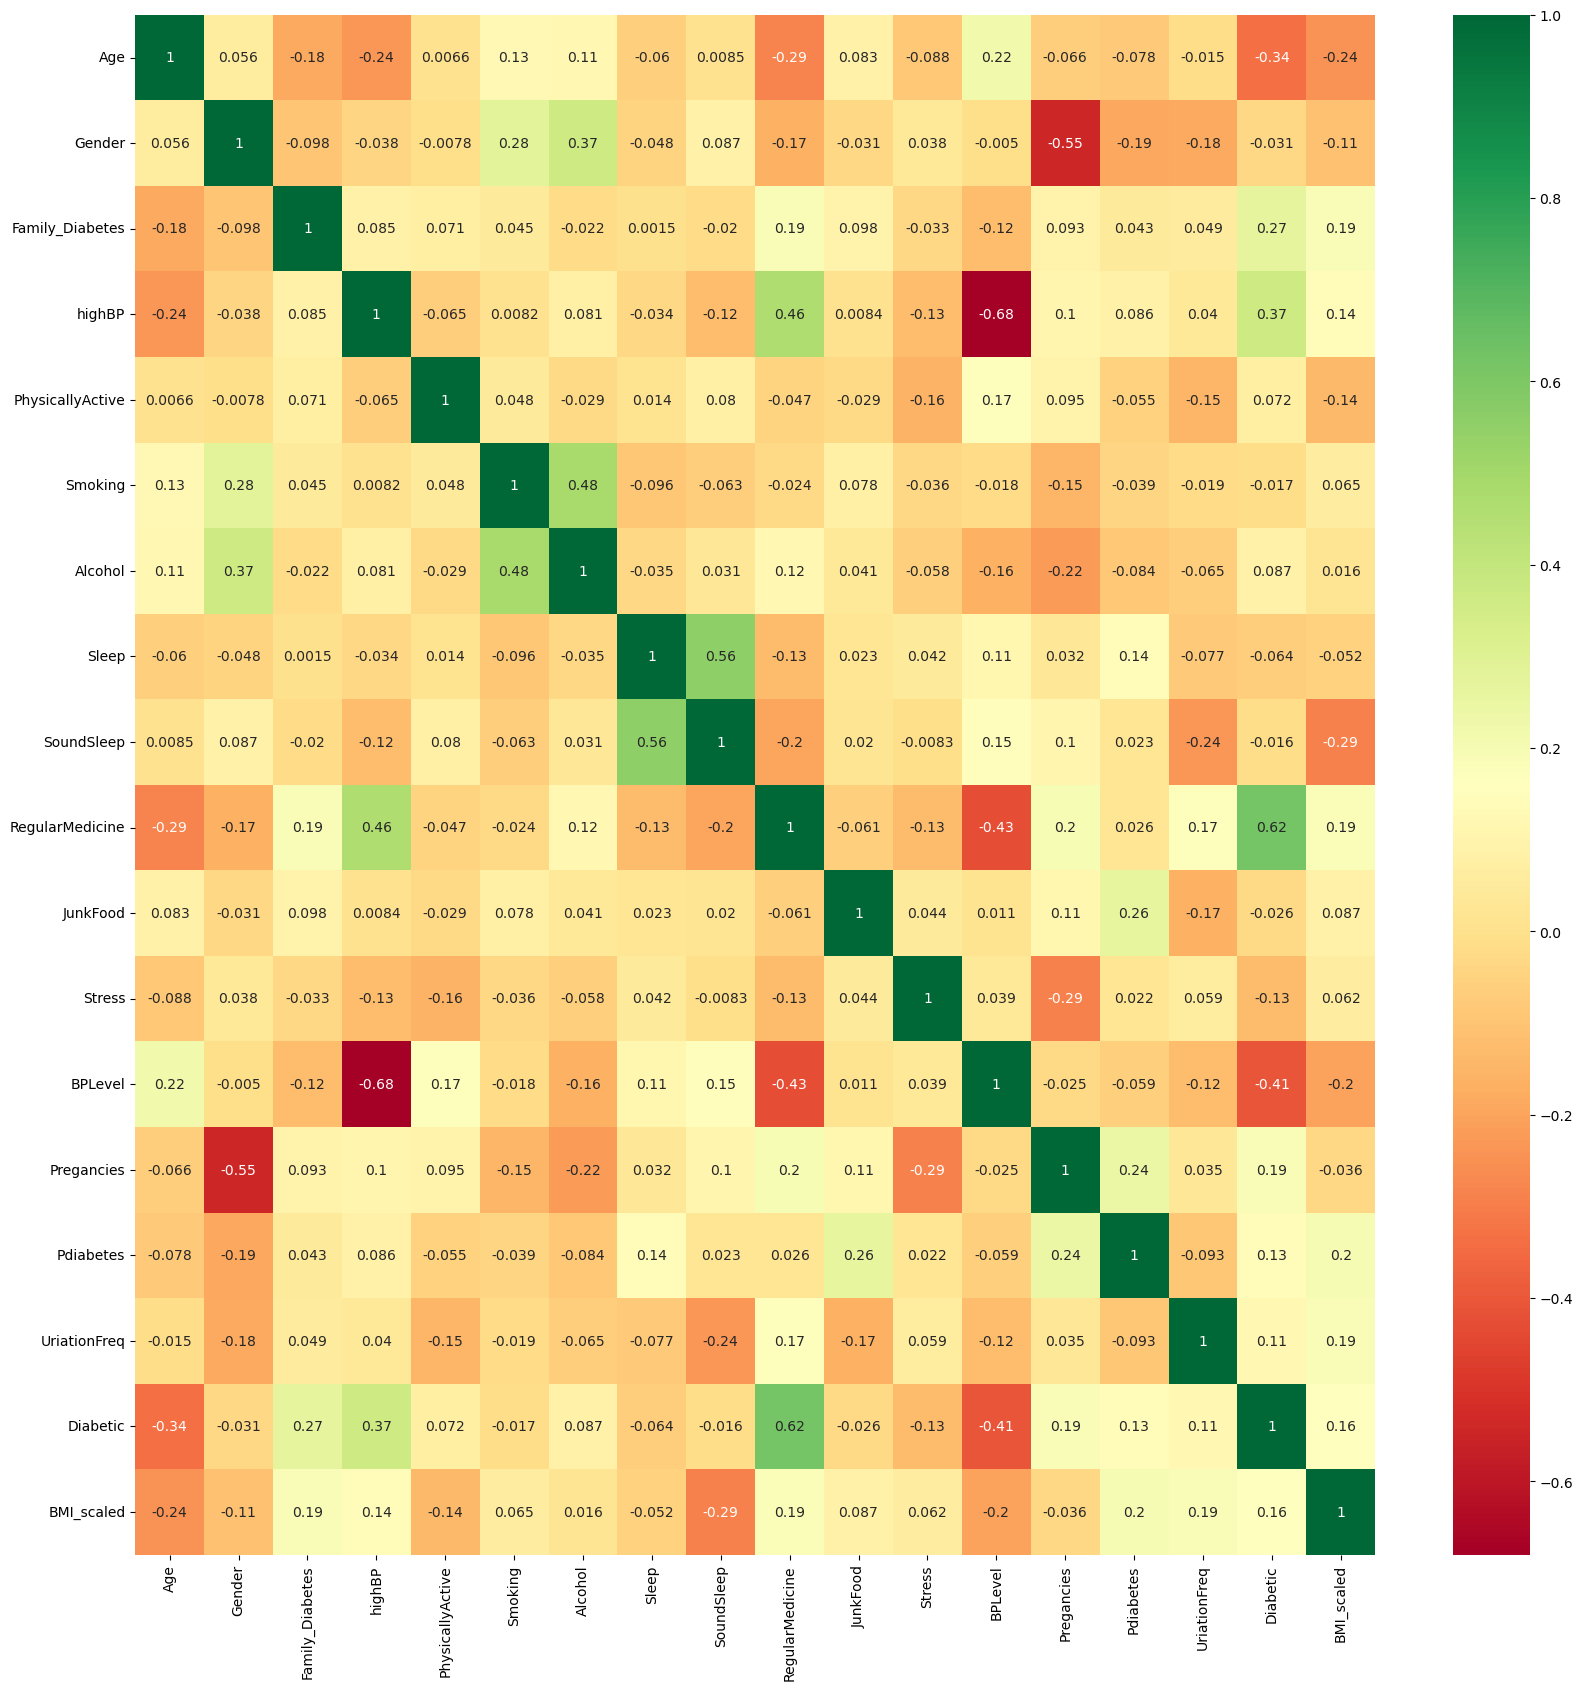

In [66]:
# Heatmap untuk mencari korelasi

import seaborn as sns
# Menentukan korelasi tiap fitur
corrmat = df_scaled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g=sns.heatmap(df_scaled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [67]:
# Menemukan fitur yang sangat berkorelasi
# Akan menghapus fitur yang berkorelasi dengan fitur pertama

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(X_train, 0.5) # 0,5 sudah angka yang cukup signifikan untuk mengecek kolerasi
len(set(corr_features))

3

In [69]:
corr_features

{'BPLevel', 'Pregancies', 'SoundSleep'}

In [70]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X.drop(corr_features, axis=1, inplace=True)
df_scaled.drop(corr_features, axis=1, inplace=True)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 348 to 950
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1284 non-null   int32  
 1   Gender            1284 non-null   int32  
 2   Family_Diabetes   1284 non-null   int32  
 3   highBP            1284 non-null   int32  
 4   PhysicallyActive  1284 non-null   int32  
 5   Smoking           1284 non-null   int32  
 6   Alcohol           1284 non-null   int32  
 7   Sleep             1284 non-null   int64  
 8   RegularMedicine   1284 non-null   int32  
 9   JunkFood          1284 non-null   int32  
 10  Stress            1284 non-null   int32  
 11  Pdiabetes         1284 non-null   int32  
 12  UriationFreq      1284 non-null   int32  
 13  Diabetic          1284 non-null   int32  
 14  BMI_scaled        1284 non-null   float64
dtypes: float64(1), int32(13), int64(1)
memory usage: 95.3 KB


Ada kolerasi antara 3 feature : {'BPLevel', 'Pregancies', 'SoundSleep'}, jadi dihapus aja

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [72]:
print(model.feature_importances_) 

[0.16757131 0.0336645  0.05367176 0.07269158 0.06284766 0.01946692
 0.02312458 0.07947119 0.25100413 0.03924876 0.06137126 0.01503569
 0.02725154 0.09357913]


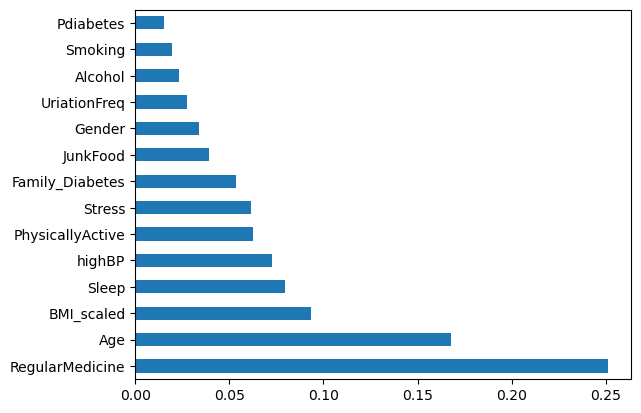

In [73]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Bisa dilihat bahwa regular medicine dan age menempati feature importance yang artinya regularmedicine dan age merupakan kolom penting untuk mendeteksi penyakit diabetes.

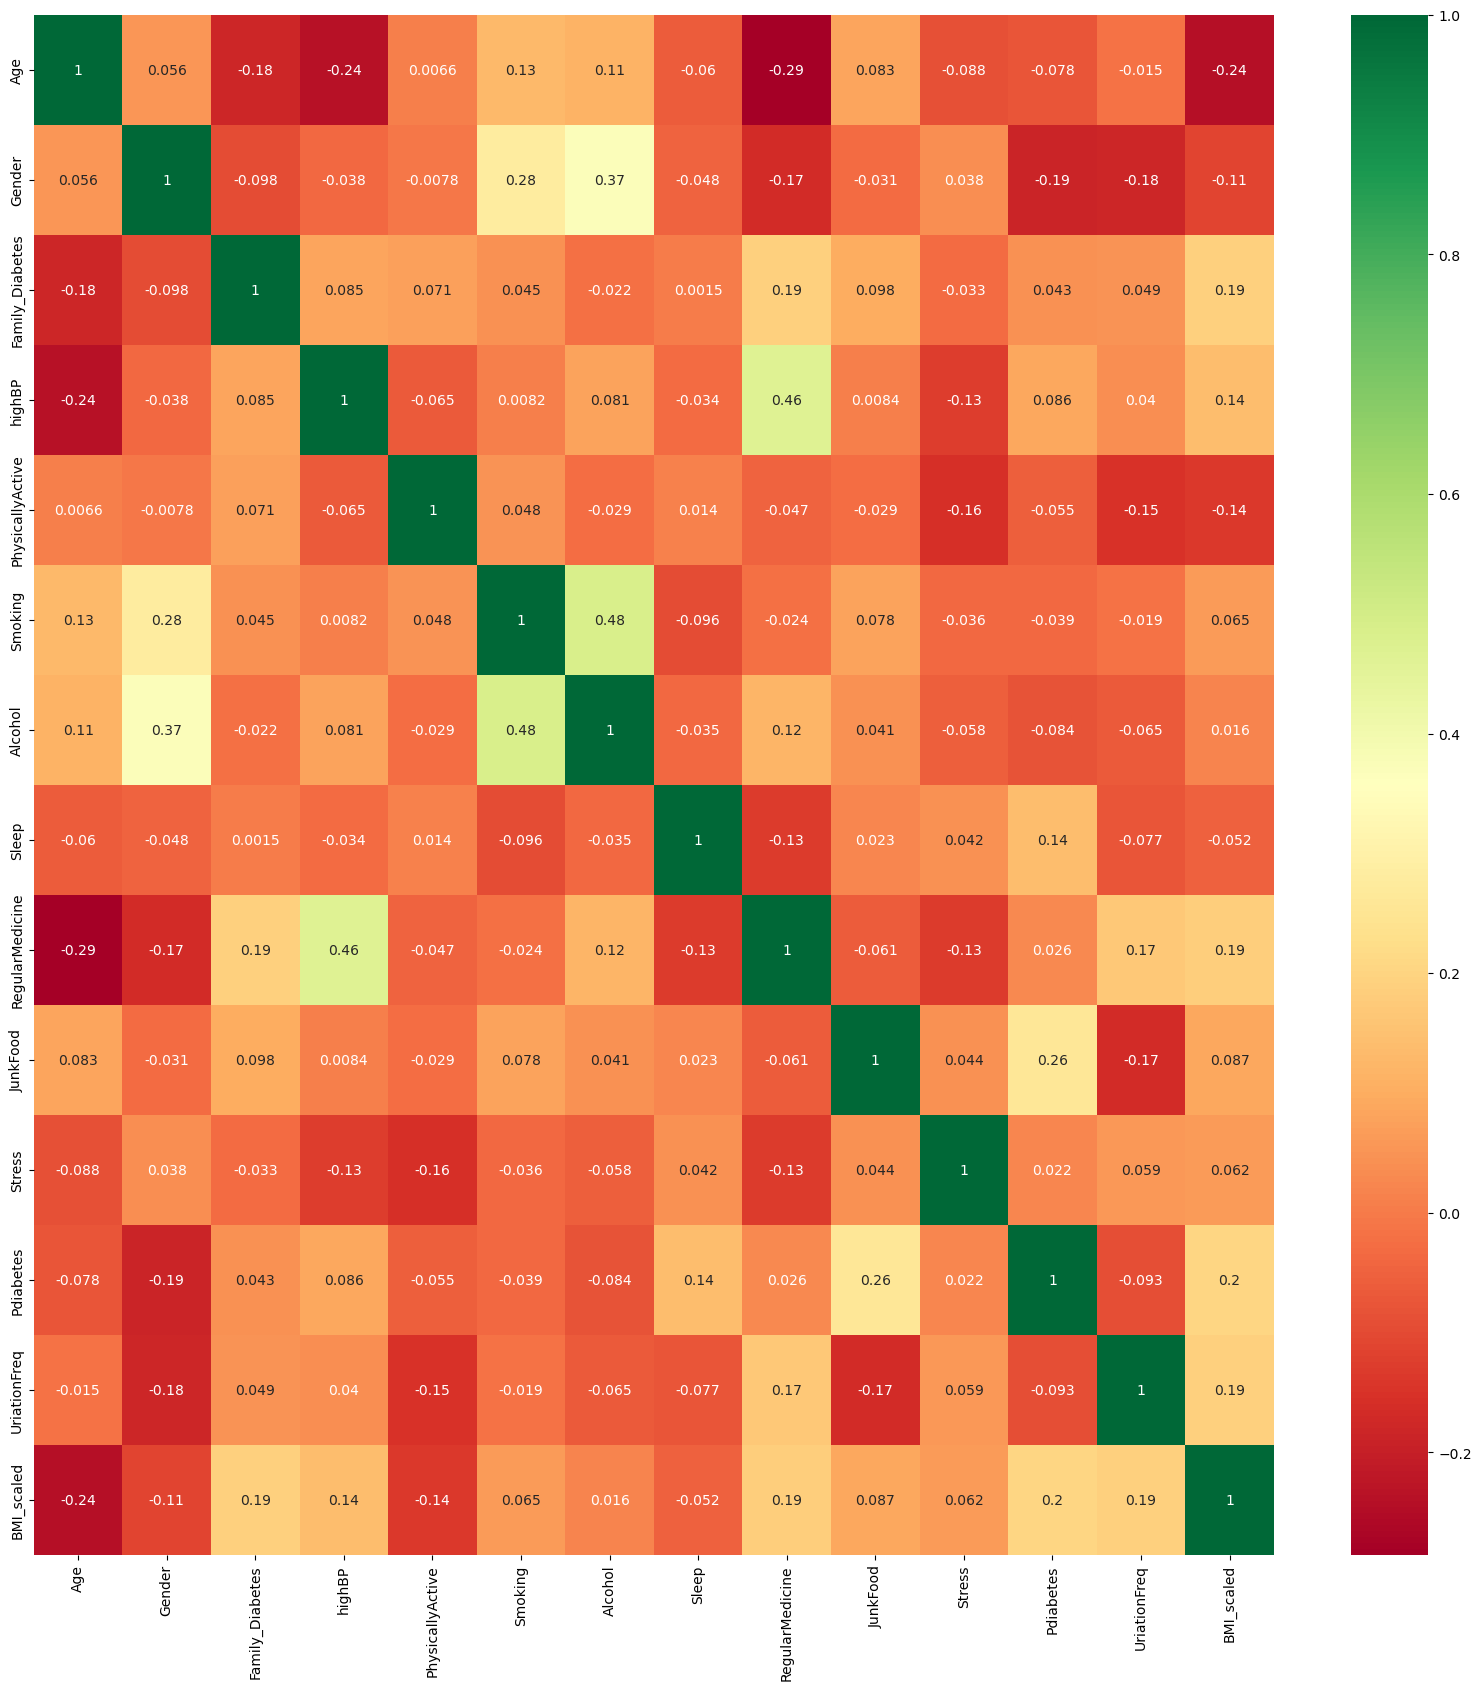

In [74]:
#heatmap untuk mencari korelasi

import seaborn as sns
#menentukan korela
corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Ini sudah dihapus {'BPLevel', 'Pregancies', 'SoundSleep'} pada dataset X_train dan X_test.

# Hyperparameter Tuning

### 1. Grid Search

#### Decision Tree X Grid

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()  # Change the model to DecisionTreeClassifier

# Tentukan himpunan nilai hyperparameter yang akan diuji
param_grid = {
    'max_depth': [None, 5, 10],  # Adjusted hyperparameter values for DecisionTreeClassifier
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.9455252918287937


#### SVM X Grid

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()  # Menggunakan Support Vector Machine (SVM)

# Tentukan himpunan nilai hyperparameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10],  # Parameter regularization (C)
    'kernel': ['linear', 'rbf'],  # Jenis kernel
    'gamma': ['scale', 'auto', 0.1, 1]  # Koefisien kernel untuk 'rbf' kernel
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy on Test Set: 0.9377431906614786


#### Logistic R X Grid

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()  # Menggunakan Logistic Regression

# Tentukan himpunan nilai hyperparameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10],  # Parameter regularization (C)
    'penalty': ['l1', 'l2']  # Jenis norm untuk regularisasi
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy on Test Set: 0.8210116731517509


#### Naive Bayes X Grid

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()  # Menggunakan Naive Bayes

# Tidak ada hyperparameter khusus yang disediakan oleh Gaussian Naive Bayes
param_grid = {}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {}
Accuracy on Test Set: 0.7976653696498055


### 2. Random Search

#### Decision Tree X Random

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()

# Tentukan ruang pencarian hyperparameter yang akan diuji
param_distributions = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi RandomizedSearchCV dengan model, parameter distributions, dan metrik evaluasi
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
random_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", random_search.best_params_)

# Evaluasi model pada data uji
y_pred = random_search.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy on Test Set: 0.9455252918287937


#### SVM X Random

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_svm = SVC()

# Tentukan ruang pencarian hyperparameter yang akan diuji
param_distributions_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Inisialisasi RandomizedSearchCV dengan model, parameter distributions, dan metrik evaluasi
random_search_svm = RandomizedSearchCV(estimator=model_svm, param_distributions=param_distributions_svm, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
random_search_svm.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters (SVM):", random_search_svm.best_params_)

# Evaluasi model pada data uji
y_pred_svm = random_search_svm.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set (SVM):", accuracy_score(y_test, y_pred_svm))

Best Hyperparameters (SVM): {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Accuracy on Test Set (SVM): 0.933852140077821


#### Logistic R X Random

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_logreg = LogisticRegression()

# Tentukan ruang pencarian hyperparameter yang akan diuji
param_distributions_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Inisialisasi RandomizedSearchCV dengan model, parameter distributions, dan metrik evaluasi
random_search_logreg = RandomizedSearchCV(estimator=model_logreg, param_distributions=param_distributions_logreg, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Lakukan pencarian kombinasi hyperparameter yang optimal pada data pelatihan
random_search_logreg.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters (Logistic Regression):", random_search_logreg.best_params_)

# Evaluasi model pada data uji
y_pred_logreg = random_search_logreg.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))


Best Hyperparameters (Logistic Regression): {'penalty': 'l2', 'C': 10}
Accuracy on Test Set (Logistic Regression): 0.8210116731517509


#### Naive Bayes X Random

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset dan model (gantilah dengan dataset dan model sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_nb = GaussianNB()

# Parameter Naive Bayes tidak banyak, jadi kita tidak perlu melakukan RandomizedSearchCV

# Pelatihan model pada data pelatihan
model_nb.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred_nb = model_nb.predict(X_test)

# Cetak performa model
print("Accuracy on Test Set (Naive Bayes):", accuracy_score(y_test, y_pred_nb))

Accuracy on Test Set (Naive Bayes): 0.7976653696498055


### 3. Ensemble Methods

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Contoh dataset (gantilah dengan dataset sesuai kebutuhan Anda)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Inisialisasi model SVM
svm_model = SVC(probability=True, random_state=42)

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Inisialisasi ensemble method dengan menggunakan VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('svm', svm_model),
    ('logistic_regression', lr_model),
    ('naive_bayes', nb_model)
], voting='soft')  # 'soft' untuk mendukung prediksi probabilitas

# Pelatihan model ensemble
ensemble_model.fit(X_train, y_train)

# Evaluasi model ensemble pada data uji
y_pred_ensemble = ensemble_model.predict(X_test)

# Cetak performa model ensemble
print("Accuracy on Test Set (Ensemble):", accuracy_score(y_test, y_pred_ensemble))


Accuracy on Test Set (Ensemble): 0.8638132295719845


In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (replace X, y with your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Setting probability to True for soft voting

# Create an ensemble of Decision Tree and SVM using soft voting
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('svm', svm_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model on the test set
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print(f"Accuracy of Ensemble Model: {accuracy_ensemble}")


Accuracy of Ensemble Model: 0.9494163424124513


### 4. Successive Halving

In [85]:
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (replace X, y with your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter configurations
param_grid = {'max_depth': [None, 5, 10]}

# Generate all combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Allocate resources using Successive Halving
for params in param_combinations:
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Hyperparameters: {params}, Accuracy: {accuracy}")


Hyperparameters: {'max_depth': None}, Accuracy: 0.9455252918287937
Hyperparameters: {'max_depth': 5}, Accuracy: 0.8988326848249028
Hyperparameters: {'max_depth': 10}, Accuracy: 0.9455252918287937


In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (replace X, y with your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter configurations
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto', 0.1, 1]}

# Model name
model_name = 'SVM'

# Base model
base_model = SVC()

# Allocate resources using Successive Halving for SVM
param_combinations = list(ParameterGrid(svm_param_grid))
print(f"\nModel: {model_name}")

for params in param_combinations:
    model = base_model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Hyperparameters: {params}, Accuracy: {accuracy}")



Model: SVM
Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.8249027237354085
Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy: 0.8404669260700389
Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}, Accuracy: 0.8249027237354085
Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}, Accuracy: 0.8482490272373541
Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, Accuracy: 0.8249027237354085
Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, Accuracy: 0.8599221789883269
Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, Accuracy: 0.8249027237354085
Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, Accuracy: 0.9299610894941635
Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.8210116731517509
Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy: 0.8249027237354085
Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}, Accur

In [87]:
from sklearn.linear_model import LogisticRegression

# ... (seperti yang sebelumnya)

# Define hyperparameter configurations
logistic_param_grid = {'C': [0.1, 1, 10]}

# Model name
model_name = 'Logistic Regression'

# Base model
base_model = LogisticRegression()

# Allocate resources using Successive Halving for Logistic Regression
param_combinations = list(ParameterGrid(logistic_param_grid))
print(f"\nModel: {model_name}")

for params in param_combinations:
    model = base_model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Hyperparameters: {params}, Accuracy: {accuracy}")



Model: Logistic Regression
Hyperparameters: {'C': 0.1}, Accuracy: 0.8171206225680934
Hyperparameters: {'C': 1}, Accuracy: 0.8210116731517509
Hyperparameters: {'C': 10}, Accuracy: 0.8210116731517509


In [88]:
from sklearn.naive_bayes import GaussianNB

# ... (seperti yang sebelumnya)

# Define hyperparameter configurations
naive_bayes_param_grid = {}  # Naive Bayes typically has fewer hyperparameters

# Model name
model_name = 'Naive Bayes'

# Base model
base_model = GaussianNB()

# Allocate resources using Successive Halving for Naive Bayes
param_combinations = list(ParameterGrid(naive_bayes_param_grid))
print(f"\nModel: {model_name}")

for params in param_combinations:
    model = base_model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Hyperparameters: {params}, Accuracy: {accuracy}")



Model: Naive Bayes
Hyperparameters: {}, Accuracy: 0.7976653696498055
